In [51]:
# Importing librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#reading the files from locals
train = pd.read_csv('/Users/manuranjangogoi/Downloads/Big_mart_sale/Train_UWu5bXk.csv')
test = pd.read_csv('/Users/manuranjangogoi/Downloads/Big_mart_sale/Test_u94Q5KV.csv')
submission = pd.read_csv('/Users/manuranjangogoi/Downloads/Big_mart_sale/SampleSubmission_TmnO39y.csv')

In [78]:
#Viewing the data
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [60]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [80]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Univariate Analysis

## #target values

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


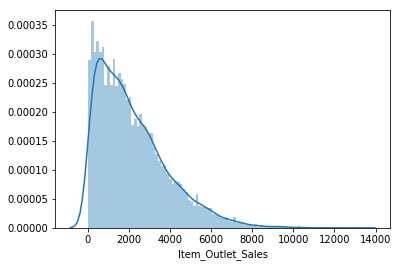

In [81]:
#train['Item_Outlet_Sales'].plot.hist(bins = 100)
sns.distplot(train['Item_Outlet_Sales'], bins =100)

##### The target value  is a right skewd variable and would need some data transformation to treat its skewness.

### #Independent Variables (Continuous)

AxesSubplot(0.125,0.125;0.775x0.755)


/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


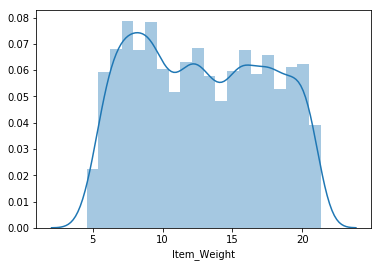

In [82]:
#cont_variables = train[['Item_Weight','Item_Visibility','Item_MRP']]
print(sns.distplot(train['Item_Weight'].dropna()))

#### There seems no clear cut-pattern in the Item_weight

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


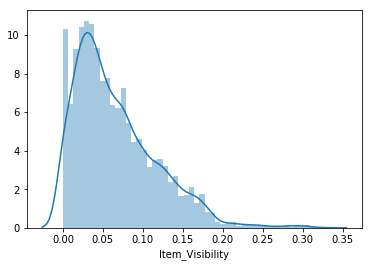

In [83]:
sns.distplot(train['Item_Visibility'],bins=50)

#### Item_Visibility is right-skewed and should be transformed to curb its skewness.

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


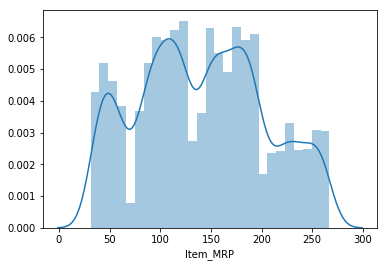

In [84]:
sns.distplot(train['Item_MRP'])

#### We can clearly see four different kind of distribution. It is a different and interesting insight

### #Independent Variables(Categorical Values)

In [67]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

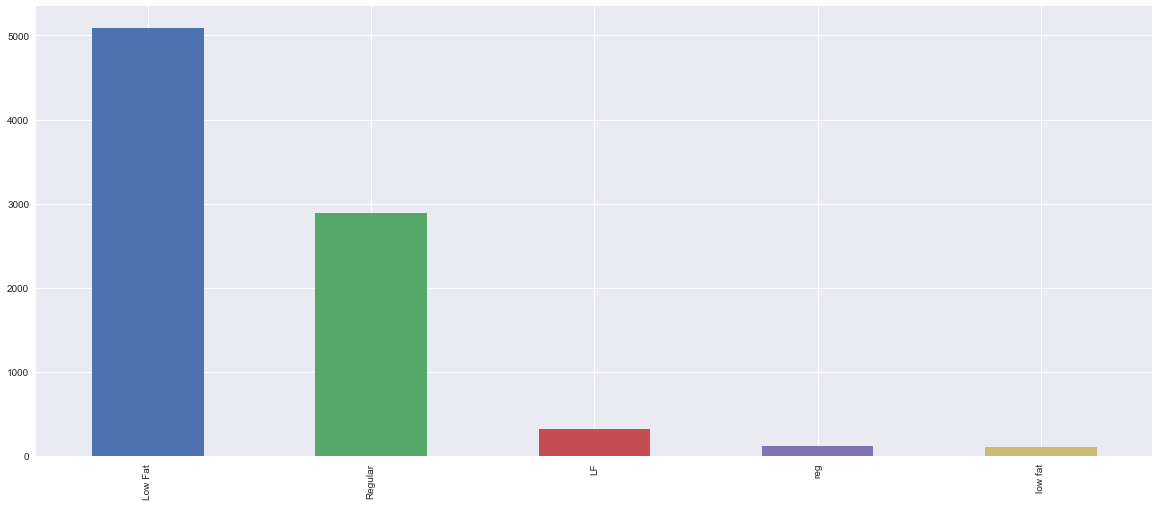

In [70]:
train.Item_Fat_Content.value_counts().plot.bar()

Here , the values "low fat", "LF", "Low Fat", ... All can be combined as "Low Fat".

And the "reg " as Regular

In [103]:
train[train['Item_Fat_Content']=='low fat']= 'Low Fat'
train[train['Item_Fat_Content']=='LF'] = 'Low Fat'
train[train['Item_Fat_Content']=='reg']='Regular'

In [72]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

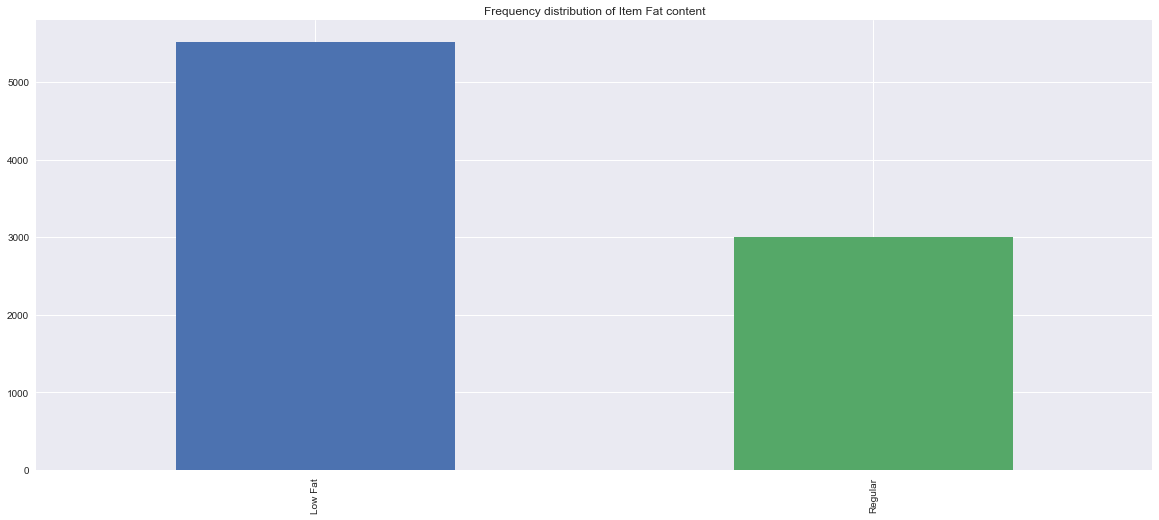

In [74]:
train.Item_Fat_Content.value_counts().plot.bar(title = "Frequency distribution of Item Fat content")

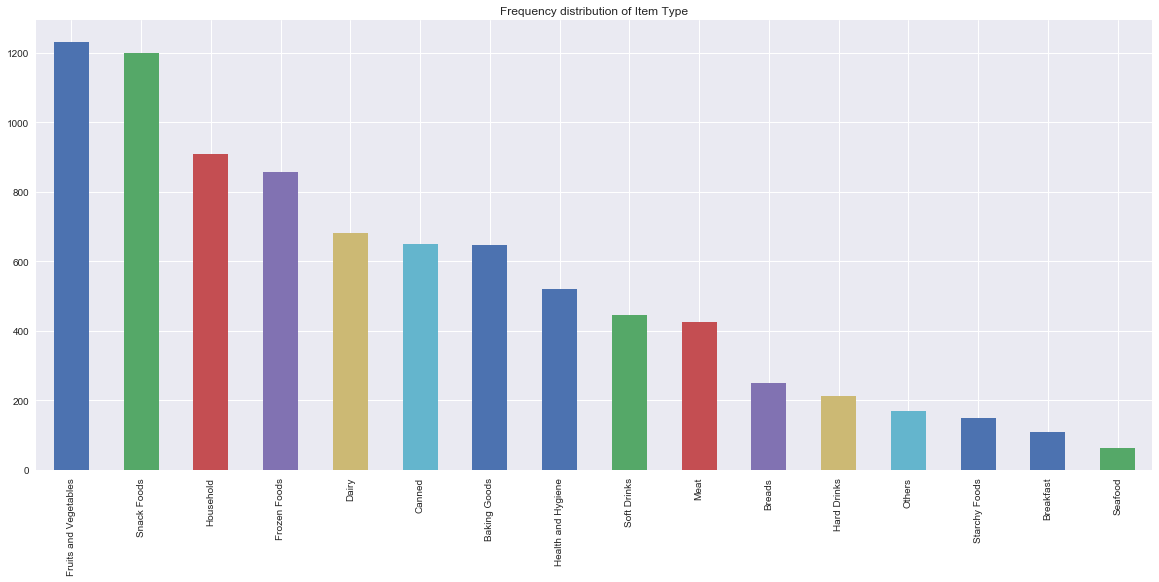

In [92]:
train.Item_Type.value_counts().plot.bar(title = "Frequency distribution of Item Type")

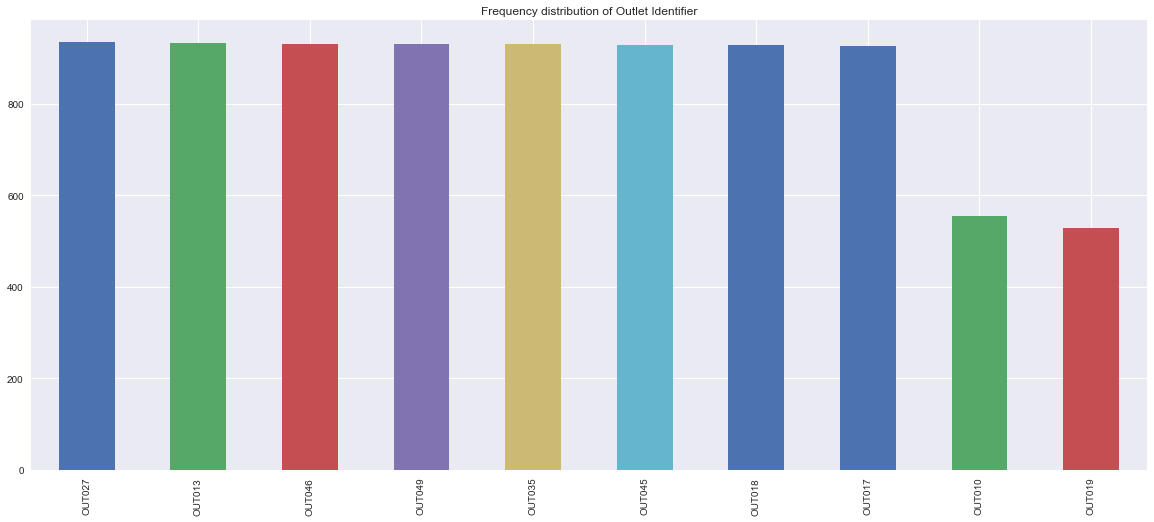

In [91]:
train.Outlet_Identifier.value_counts().plot.bar(title = "Frequency distribution of Outlet Identifier")

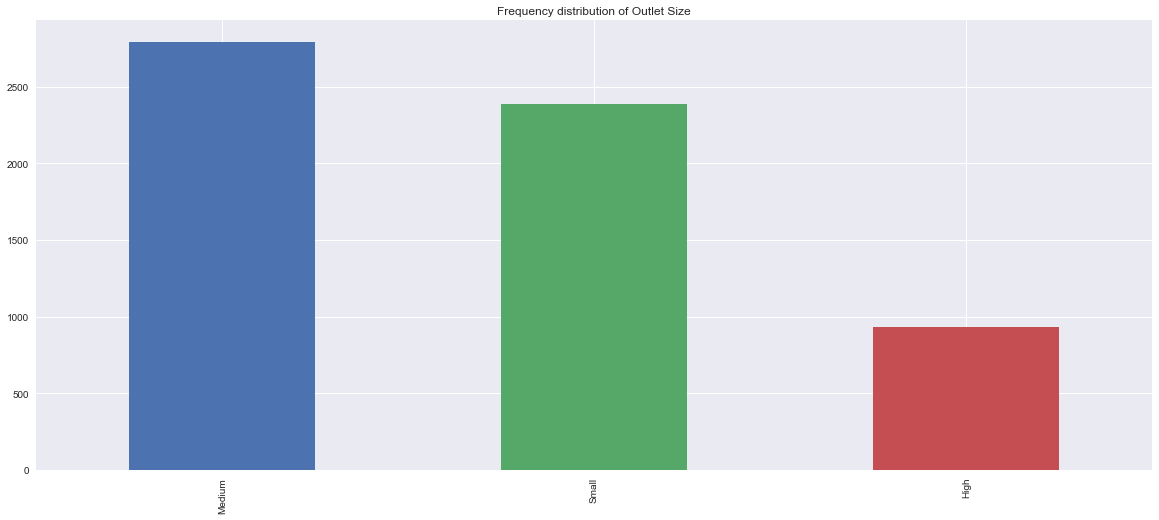

In [90]:
train.Outlet_Size.value_counts().plot.bar(title = "Frequency distribution of Outlet Size")

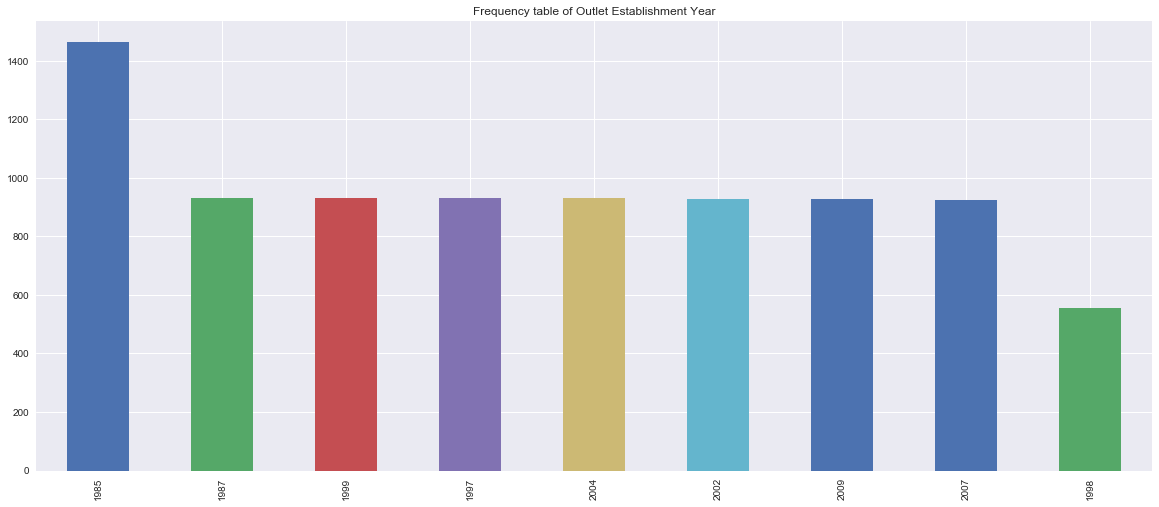

In [94]:
train.Outlet_Establishment_Year.value_counts().plot.bar(title = "Frequency table of Outlet Establishment Year")

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.

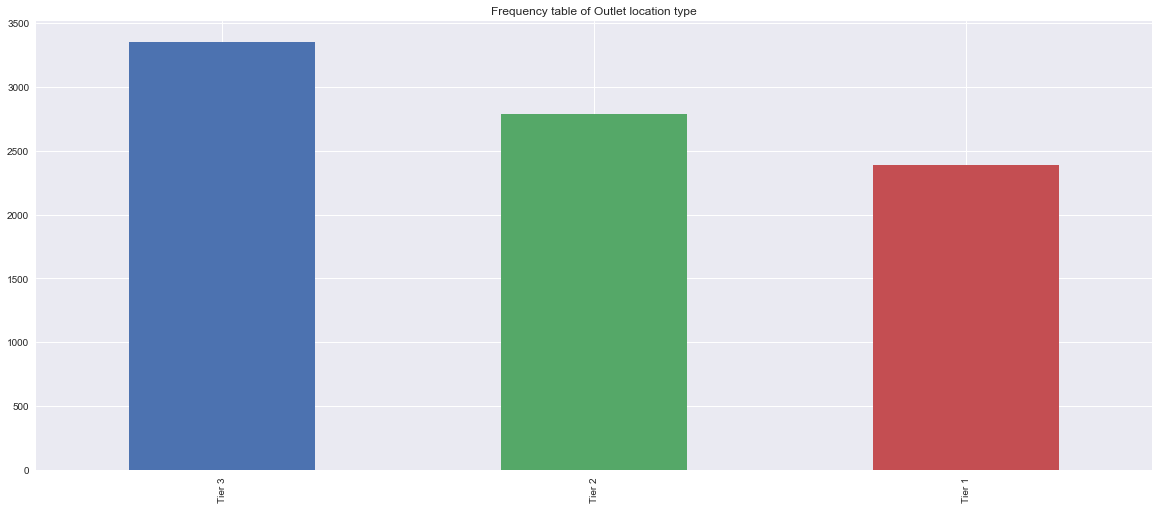

In [99]:
train.Outlet_Location_Type.value_counts().plot.bar(title = "Frequency table of Outlet location type")

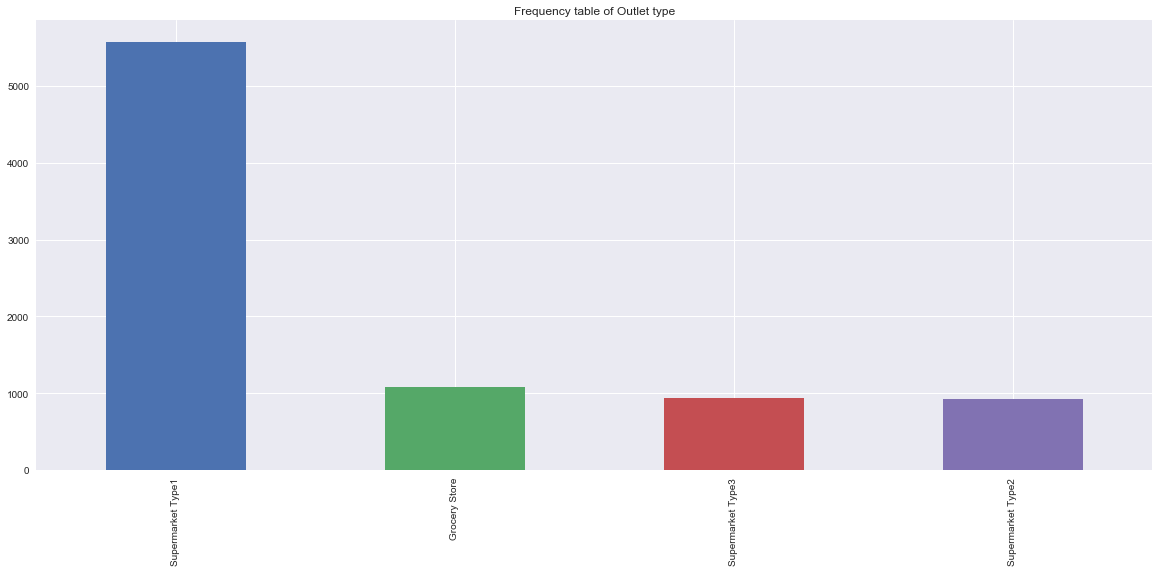

In [101]:
train.Outlet_Type.value_counts().plot.bar(title = "Frequency table of Outlet type")

Supermarket Type 1 seems to be the most popular category of Outlet_Type.


# Bivariate Analysis

### Target variable vs Independent Continuous Variables

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


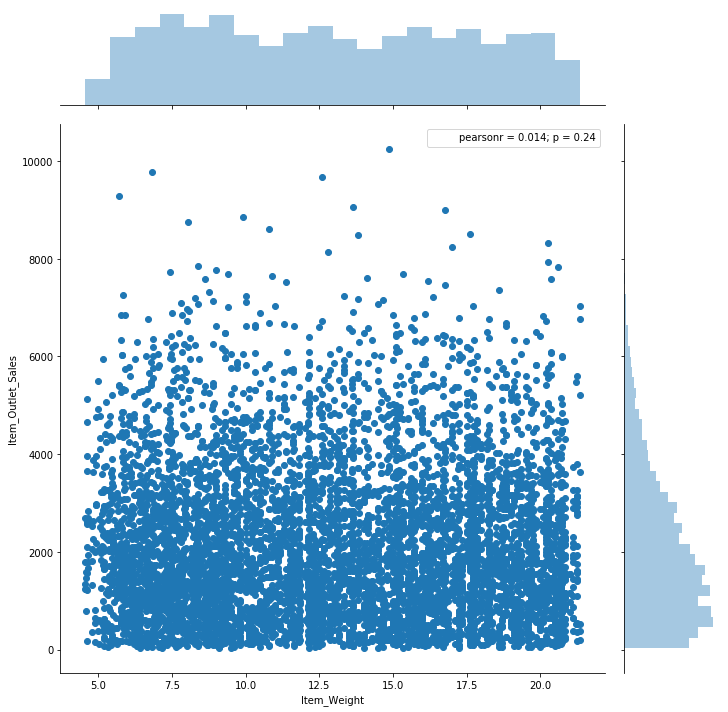

In [98]:
#train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]
sns.jointplot(train['Item_Weight'],train['Item_Outlet_Sales'],size =10)

Item_Outlet_Sale is spread across the entire range of the Item_Weight without any obvious pattern.

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


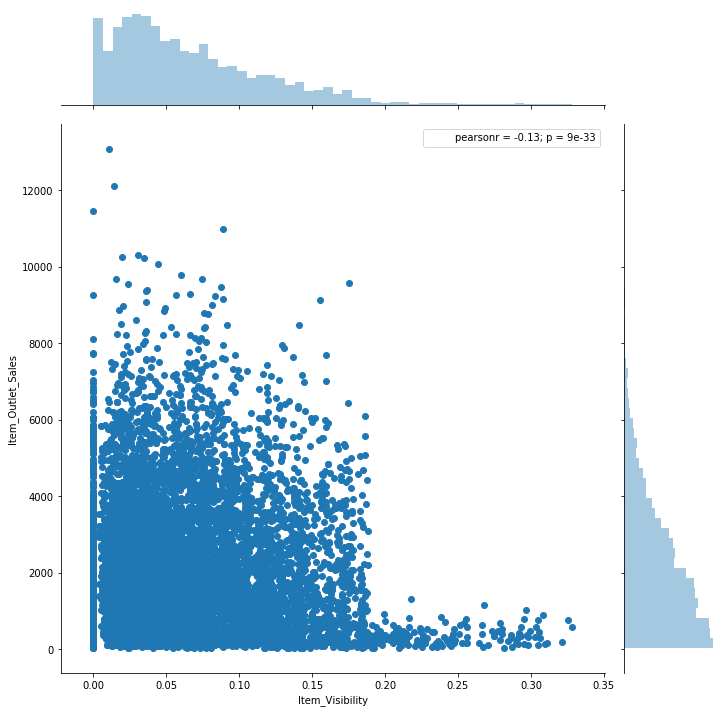

In [99]:
sns.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],size =10)

In Item_visibility vs the outlet_sales, 

their is a string of points t Item_visibility == 0.00 , which seems strange as item visibility cannot be completely zero.

Which is really something to take care of.

/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/manuranjangogoi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


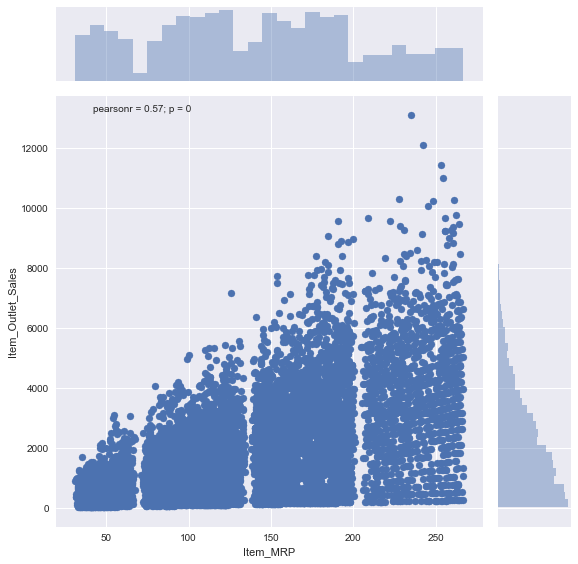

In [45]:
sns.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],size =8)

### Target Variable vs Independent Categorical values.

#### Item_Type vs Item_Outlet_Sales

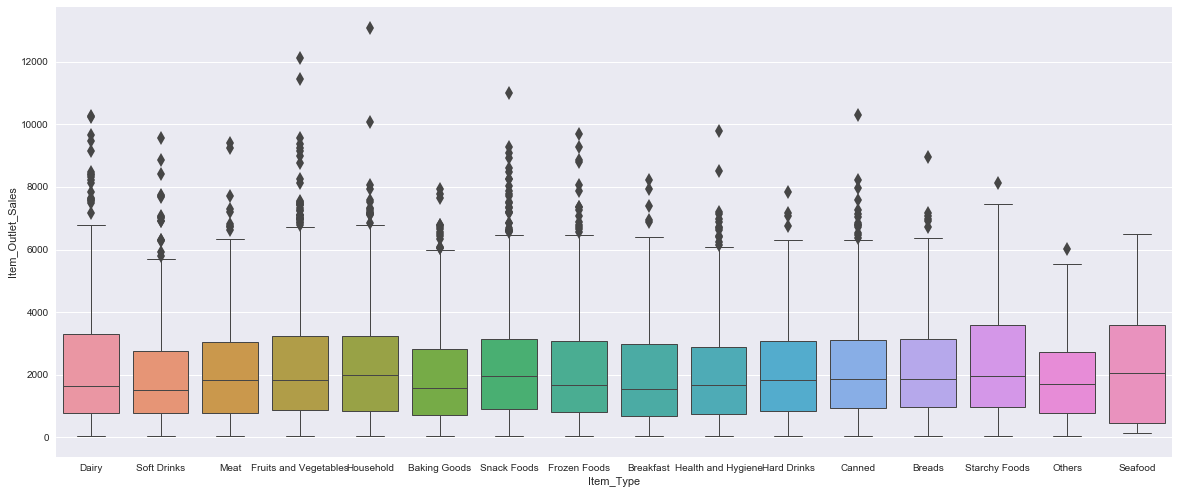

In [33]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot('Item_Type','Item_Outlet_Sales', data = train,fliersize = 10, linewidth =1)

#### Item_Fat_Content vs Item_Outlet_Sales

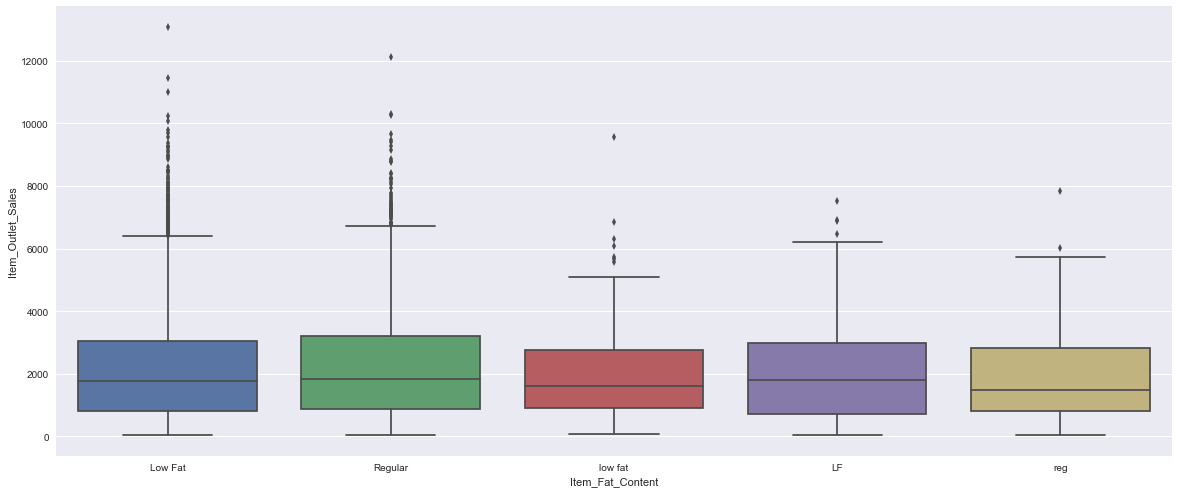

In [40]:
sns.boxplot('Item_Fat_Content','Item_Outlet_Sales', data = train)

#### Outlet_Identifier vs Item_Outlet_Sales

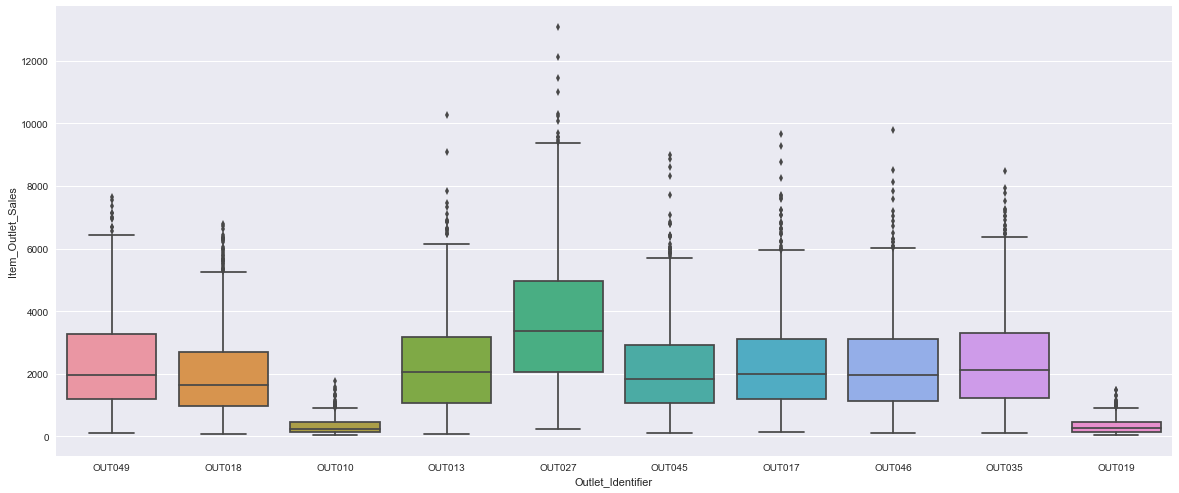

In [46]:
sns.boxplot('Outlet_Identifier','Item_Outlet_Sales',data =train)

#### Outlet_Size vs Item_Outlet_Sales

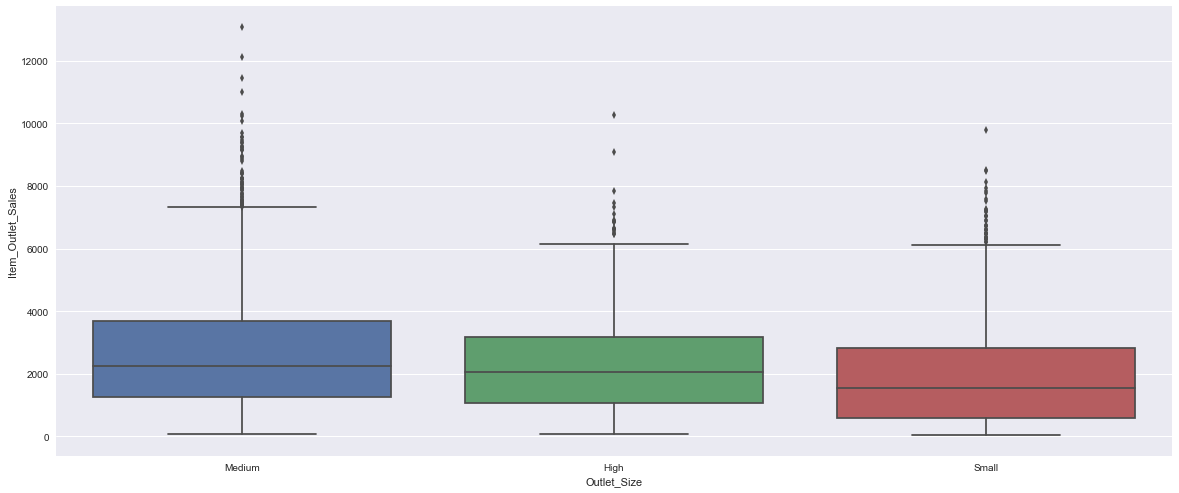

In [49]:
sns.boxplot('Outlet_Size','Item_Outlet_Sales',data = train)

In [106]:
#sns.boxplot('Item_Fat_Content','Item_Outlet_Sales',data = train)

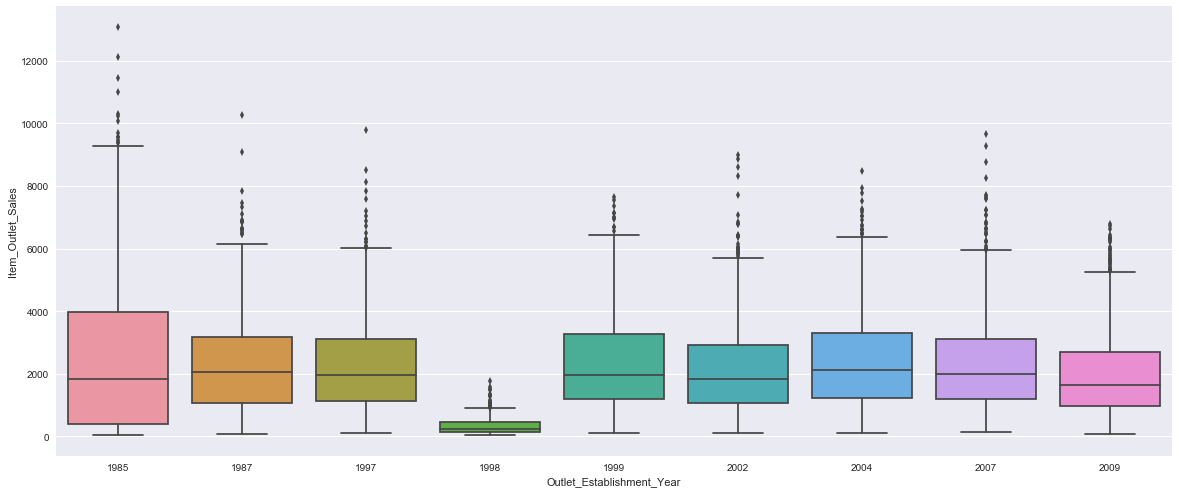

In [107]:
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data = train)

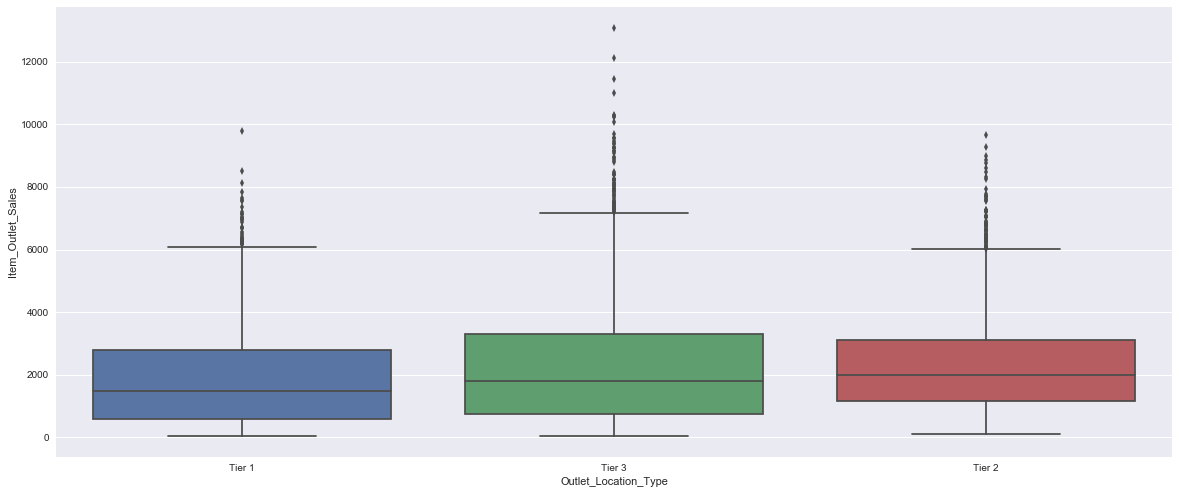

In [108]:
sns.boxplot('Outlet_Location_Type','Item_Outlet_Sales',data = train)

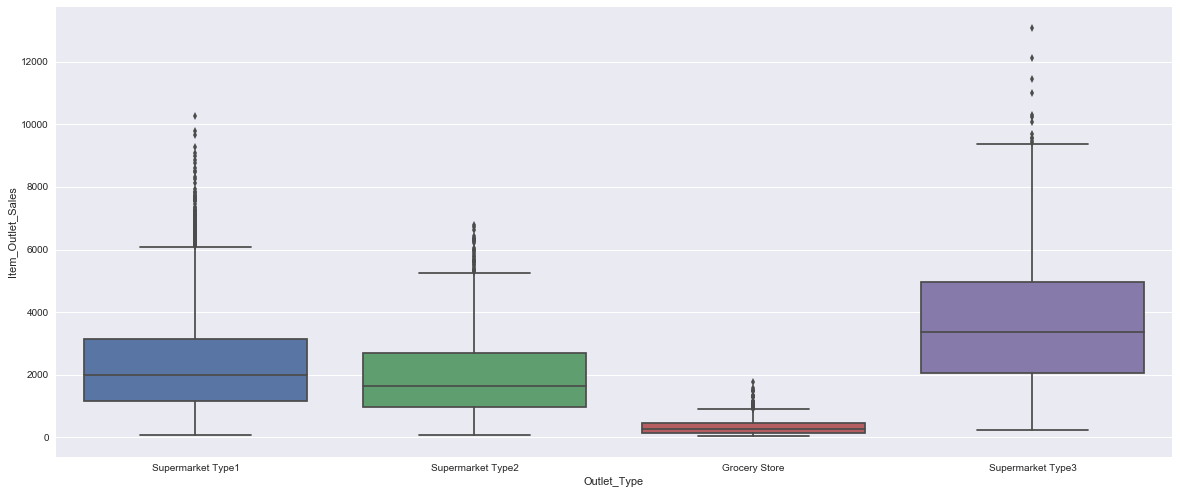

In [109]:
sns.boxplot('Outlet_Type','Item_Outlet_Sales',data = train)

Grocery Store has most of its data points around the lower sales values as compared to the other categories.
